# Projeto análise de dados - Dados sobre COVID-19 no Brasil (2021)  

Esse projeto visa entender como os casos e óbitos da COVID-19 se comportaram durante o ano de 2021 no Brasil.

## Coleta e extração

In [1]:
# Importanto bibliotecas que serão utilizadas
import os
import pandas as pd
import numpy as np

In [2]:
# Manipulando diretorios 
PATH_DIR = os.getcwd()
ROOT_DIR = os.path.join(PATH_DIR, "..")
DATA_DIR = os.path.join(ROOT_DIR, "data")

In [3]:
# Manipulando diretorios de entrada
DATA_PATH = [os.path.join(DATA_DIR, name) for name in os.listdir(DATA_DIR)]

In [4]:
# Manipulando diretorios de saida
PATH_OUTPUT = os.path.join(ROOT_DIR, "output")
PATH_DATA_BRAZIL_OUTPUT = os.path.join(PATH_OUTPUT, "data_brazil_2021.csv")

In [5]:
# Carregando dados
df = None

for path in DATA_PATH:
    if f"HIST_PAINEL_COVIDBR_2021" in path and '.csv' in path:
      data = pd.read_csv(path, sep=";", encoding="utf-8")
      
      if df is None:
        df = data
      else:
        df = pd.concat([df, data], ignore_index=True)

In [6]:
# Filtrando para dados do Brasil
df_brazil = df[df["regiao"] == "Brasil"]

In [7]:
# Formatando index
df_brazil = df_brazil.reset_index(drop=True)
df_brazil

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-01,53,210147125.0,7700578.0,24605,195411,462,6747065.0,733959.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-02,53,210147125.0,7716405.0,15827,195725,314,6756284.0,748883.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-03,1,210147125.0,7733746.0,17341,196018,293,6769420.0,751260.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-04,1,210147125.0,7753752.0,20006,196561,543,6813008.0,724720.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-05,1,210147125.0,7810400.0,56648,197732,1171,6875230.0,681961.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-12-27,52,210147125.0,22246276.0,6840,618534,86,21557380.0,70362.0,NaN
361,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-12-28,52,210147125.0,22254706.0,8430,618705,171,21567845.0,68156.0,NaN
362,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-12-29,52,210147125.0,22263834.0,9128,618817,112,21575485.0,69532.0,NaN
363,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-12-30,52,210147125.0,22277239.0,13405,618984,167,21582700.0,75555.0,NaN


### Limpando e tratando dados

In [8]:
df_brazil.isnull().sum()

regiao                      0
estado                    365
municipio                 365
coduf                       0
codmun                    365
codRegiaoSaude            365
nomeRegiaoSaude           365
data                        0
semanaEpi                   0
populacaoTCU2019            0
casosAcumulado              0
casosNovos                  0
obitosAcumulado             0
obitosNovos                 0
Recuperadosnovos            0
emAcompanhamentoNovos       0
interior/metropolitana    365
dtype: int64

In [9]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   regiao                  365 non-null    object 
 1   estado                  0 non-null      object 
 2   municipio               0 non-null      object 
 3   coduf                   365 non-null    int64  
 4   codmun                  0 non-null      float64
 5   codRegiaoSaude          0 non-null      float64
 6   nomeRegiaoSaude         0 non-null      object 
 7   data                    365 non-null    object 
 8   semanaEpi               365 non-null    int64  
 9   populacaoTCU2019        365 non-null    float64
 10  casosAcumulado          365 non-null    float64
 11  casosNovos              365 non-null    int64  
 12  obitosAcumulado         365 non-null    int64  
 13  obitosNovos             365 non-null    int64  
 14  Recuperadosnovos        365 non-null    fl

In [10]:
# Verificando se de fato só tem dados do Brasil e não dos seus estados
print(df_brazil["populacaoTCU2019"].unique())
print(df_brazil["municipio"].unique())
print(df_brazil["estado"].unique())
print(df_brazil["regiao"].unique())


[2.10147125e+08]
[nan]
[nan]
['Brasil']


In [11]:
# Salvando numero de populacao
population_brazil = int(df["populacaoTCU2019"].iloc[0])
population_brazil

210147125

In [12]:
# Excluindo colunas desnecessarias
df_brazil = df_brazil.drop(columns=[
  "estado", "municipio", "coduf", "codmun", "codRegiaoSaude", "nomeRegiaoSaude", "populacaoTCU2019", "interior/metropolitana", "regiao"
])
df_brazil

,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,2021-01-01,53,7700578.0,24605,195411,462,6747065.0,733959.0
1,2021-01-02,53,7716405.0,15827,195725,314,6756284.0,748883.0
2,2021-01-03,1,7733746.0,17341,196018,293,6769420.0,751260.0
3,2021-01-04,1,7753752.0,20006,196561,543,6813008.0,724720.0
4,2021-01-05,1,7810400.0,56648,197732,1171,6875230.0,681961.0
...,...,...,...,...,...,...,...,...
360,2021-12-27,52,22246276.0,6840,618534,86,21557380.0,70362.0
361,2021-12-28,52,22254706.0,8430,618705,171,21567845.0,68156.0
362,2021-12-29,52,22263834.0,9128,618817,112,21575485.0,69532.0
363,2021-12-30,52,22277239.0,13405,618984,167,21582700.0,75555.0


In [13]:
# Formatando as datas
df_brazil["data"] = pd.to_datetime(df_brazil["data"], format="%Y-%m-%d")

In [14]:
# Listando os tipos
df_brazil.dtypes

data                     datetime64[ns]
semanaEpi                         int64
casosAcumulado                  float64
casosNovos                        int64
obitosAcumulado                   int64
obitosNovos                       int64
Recuperadosnovos                float64
emAcompanhamentoNovos           float64
dtype: object

In [15]:
# Transformando recuperados, em acompanhamentos e casos acumulados em int64
df_brazil["Recuperadosnovos"] = df_brazil["Recuperadosnovos"].astype("int64")
df_brazil["emAcompanhamentoNovos"] = df_brazil["emAcompanhamentoNovos"].astype("int64")
df_brazil["casosAcumulado"] = df_brazil["casosAcumulado"].astype("int64")
df_brazil.dtypes


data                     datetime64[ns]
semanaEpi                         int64
casosAcumulado                    int64
casosNovos                        int64
obitosAcumulado                   int64
obitosNovos                       int64
Recuperadosnovos                  int64
emAcompanhamentoNovos             int64
dtype: object

In [16]:
df_brazil.drop(columns=["data", "semanaEpi"]).describe().round(2)

,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,17000494.83,40031.64,464251.65,1161.94,15783165.44,715522.90
std,4776357.02,28463.23,146219.69,951.46,4928408.18,386762.71
min,7700578.00,-573.00,195411.00,24.00,6747065.00,68156.00
25%,12910082.00,13957.00,328206.00,389.00,11239099.00,359523.00
50%,18687469.00,34339.00,521952.00,962.00,16931272.00,791923.00
75%,21445651.00,64025.00,597255.00,1641.00,20432643.00,1076873.00
max,22287521.00,150106.00,619056.00,4249.00,21584402.00,1317658.00


### Exportação

In [17]:
# Exportação relatorio mensal do brasil
df_brazil.to_csv(PATH_DATA_BRAZIL_OUTPUT, sep=";")

## Análise exploratória de dados 

In [18]:
# Importando bibliotecas que serão utilizidas
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = df_brazil

In [20]:
# Enxergando o head
df.head()

,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,2021-01-01,53,7700578,24605,195411,462,6747065,733959
1,2021-01-02,53,7716405,15827,195725,314,6756284,748883
2,2021-01-03,1,7733746,17341,196018,293,6769420,751260
3,2021-01-04,1,7753752,20006,196561,543,6813008,724720
4,2021-01-05,1,7810400,56648,197732,1171,6875230,681961


### Limpeza e tratamento

In [21]:
# Criando um dataframe para separar novos casos e obitos por semana de EPI 
df_cases_and_deads = df.drop(columns=["casosAcumulado", "Recuperadosnovos","emAcompanhamentoNovos", "data", "obitosAcumulado"] ).groupby("semanaEpi").sum()

> Fiz isso para que seja mais visivel o gráfico de novos casos e óbitos

In [22]:
# enxergando a tabela
df_cases_and_deads.head()

,casosNovos,obitosNovos
semanaEpi,,
1,359593,6906
2,379061,6665
3,361195,7149
4,360721,7500
5,320820,7067


### Análise Exploratória de Dados

#### Medidas estatísticas na análise descritiva

In [23]:
# Analisando o compotamento das variáveis
df.drop(columns=["data", "semanaEpi"]).describe().iloc[1:].round(2)

,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
mean,17000494.83,40031.64,464251.65,1161.94,15783165.44,715522.90
std,4776357.02,28463.23,146219.69,951.46,4928408.18,386762.71
min,7700578.00,-573.00,195411.00,24.00,6747065.00,68156.00
25%,12910082.00,13957.00,328206.00,389.00,11239099.00,359523.00
50%,18687469.00,34339.00,521952.00,962.00,16931272.00,791923.00
75%,21445651.00,64025.00,597255.00,1641.00,20432643.00,1076873.00
max,22287521.00,150106.00,619056.00,4249.00,21584402.00,1317658.00


> - Em 21/09/21 houve uma revisão no estado do Ceará e diminuiram 12 mil casos, por isso o minimo é -573
> - Podemos ver que novos casos e óbitos variam muito em relação média, pois a desvio padrão é muito alto
> - Como casosAcumulado é crescente, então podemos dizer que: 25% é o primeiro trimestre de 2021, 25% a 50% é o segundo trimestre do mesmo ano e assim por diante. Com isso, se formos observar o número de casos de cada trimeste ficaria dessa forma:
>   - 1° Trimestre: 5.209.504 casos
>   - 2º Trimestre: 5.777.387 casos
>   - 3° Trimestre: 2.758.182 casos
>   - 4° Trimestre: 841.870 casos
> - Ou seja, o pico da COVID-19 em 2021 no Brasil foi o 1° semestre

#### Análise Univariada

Casos acumulados

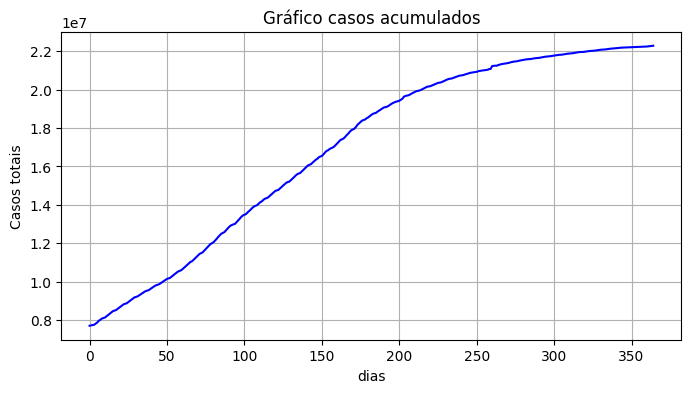

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index.values, df["casosAcumulado"], color="b")

plt.title("Gráfico casos acumulados")
plt.ylabel("Casos totais")
plt.xlabel("dias")

plt.grid(True)

plt.show()

Novos Casos

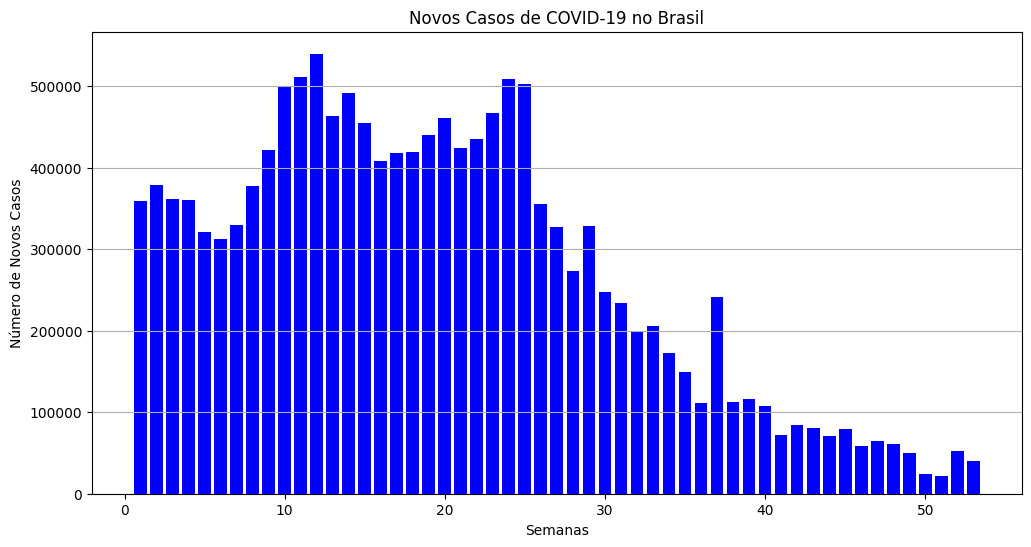

In [25]:
plt.figure(figsize=(12, 6))
plt.bar(df_cases_and_deads.index.values, df_cases_and_deads['casosNovos'], color='b')
plt.title('Novos Casos de COVID-19 no Brasil')
plt.xlabel('Semanas')
plt.ylabel('Número de Novos Casos')
plt.grid(axis='y')
plt.show()

> - 18/09/21 houve uma revisão no estado do Rio de Janeiro e foram incluidos registros antigos. Com isso houve uma super aumento no número de dados para 150mil
> - O carnaval de 2021 no Brasil foi na semana EPI 7, pode-se ver que antes dessa semana estava em queda o números de casos, mas logo após ela, os casos aumentaram bastante

Óbitos acumulados

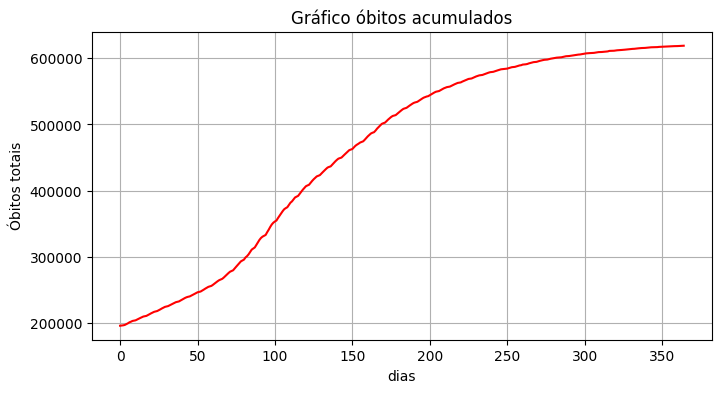

In [26]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index.values, df["obitosAcumulado"], color="r")

plt.title("Gráfico óbitos acumulados")
plt.ylabel("Óbitos totais")
plt.xlabel("dias")
plt.grid(True)

plt.show()

Novos Óbitos

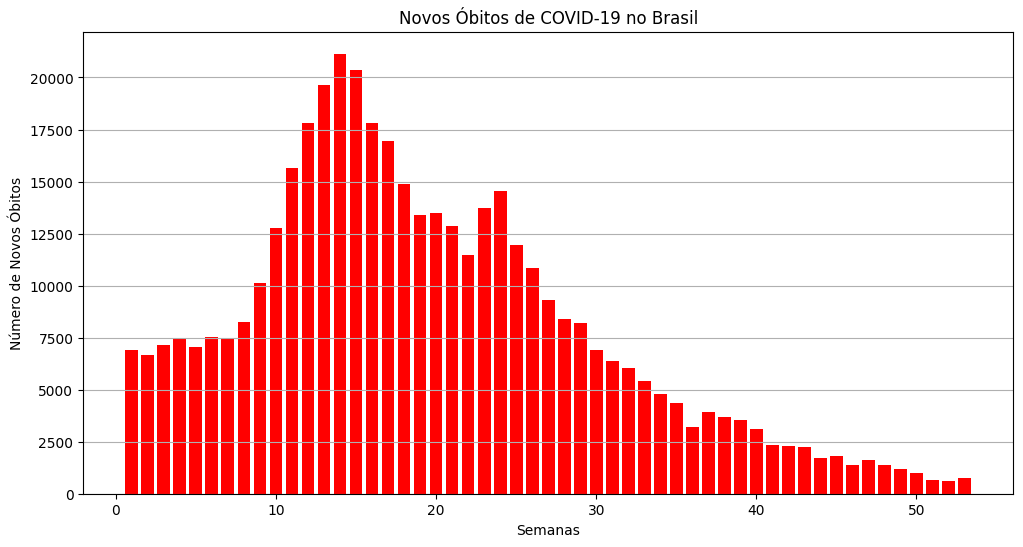

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(df_cases_and_deads.index.values, df_cases_and_deads['obitosNovos'], color='r')
plt.title('Novos Óbitos de COVID-19 no Brasil')
plt.xlabel('Semanas')
plt.ylabel('Número de Novos Óbitos')
plt.grid(axis='y')
plt.show()

> - 13/11/21 revisão de dados em São Paulo
> 

Novos Recuperados

Text(0.5, 0, 'dias')

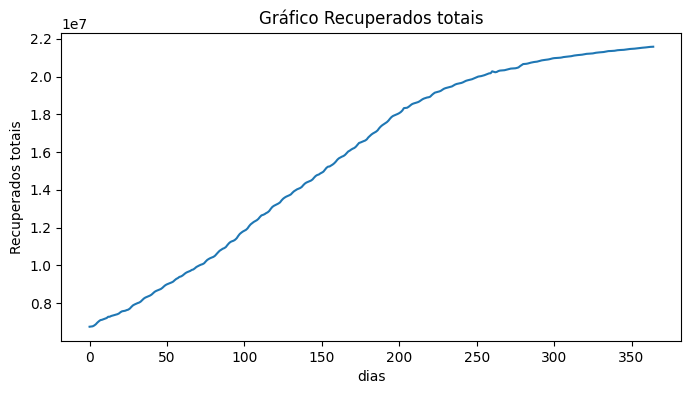

In [28]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index.values, df["Recuperadosnovos"])

plt.title("Gráfico Recuperados totais")
plt.ylabel("Recuperados totais")
plt.xlabel("dias")


Novos em Acompanhamento

Text(0.5, 0, 'dias')

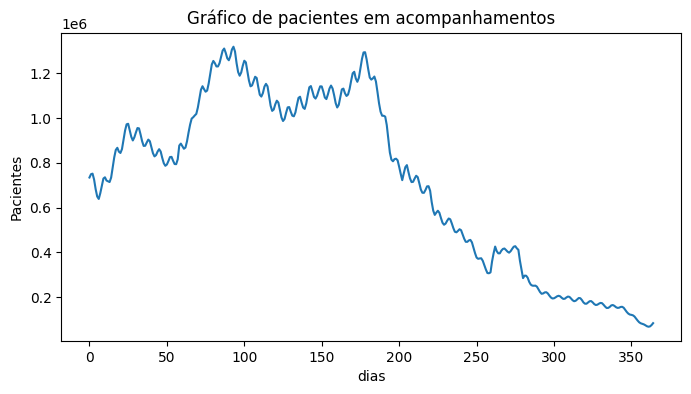

In [29]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index.values, df["emAcompanhamentoNovos"])

plt.title("Gráfico de pacientes em acompanhamentos")
plt.ylabel("Pacientes")
plt.xlabel("dias")

#### Análise Bivariada 

Novos casos x Obitos novos

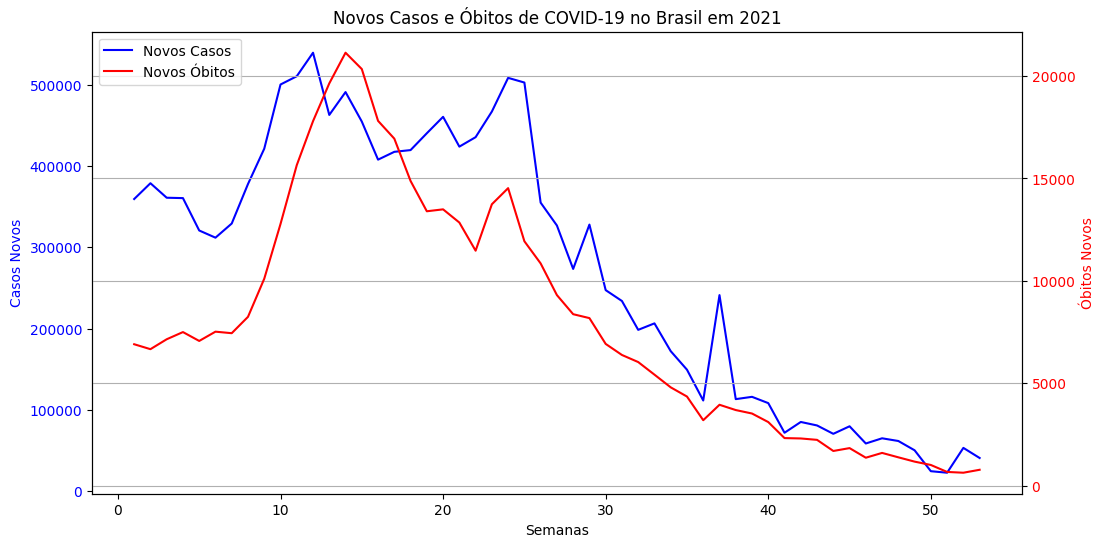

In [30]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Semanas')
ax1.set_ylabel('Casos Novos', color='b')
ax1.tick_params(axis='y', labelcolor='b')
line_cases = (ax1.plot(df_cases_and_deads.index.values, df_cases_and_deads['casosNovos'], color='b', label='Novos Casos'))[0]

ax2 = ax1.twinx()
ax2.set_ylabel('Óbitos Novos', color='r')
ax2.tick_params(axis='y', labelcolor='r')
line_deads = (ax2.plot(df_cases_and_deads.index.values, df_cases_and_deads['obitosNovos'], color='r', label='Novos Óbitos'))[0]

lines = [line_cases, line_deads]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.title('Novos Casos e Óbitos de COVID-19 no Brasil em 2021')

plt.grid(True)
plt.show()

> - Pode-se ver que os gráficos tem certa semelhança, a partir que o numero de casos tem um crescimento ou uma diminuição, logo depois o número de óbitos também irá ter.

Casos acumulados x Óbitos acumulados

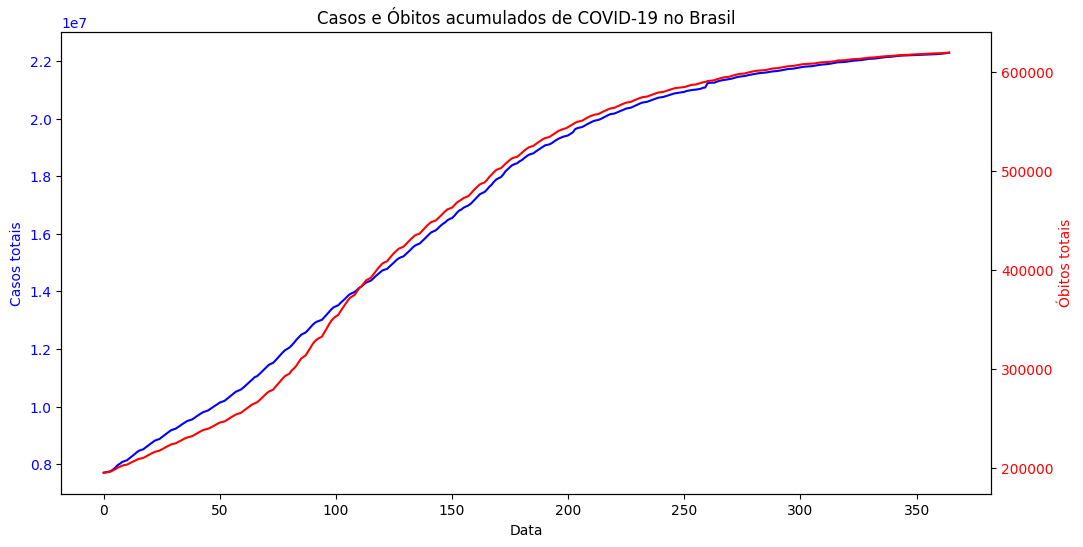

In [31]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Data')
ax1.set_ylabel('Casos totais', color='b')
ax1.plot(df.index.values, df['casosAcumulado'], color='b', label='Casos totais')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Óbitos totais', color='r')
ax2.plot(df.index.values, df['obitosAcumulado'], color='r', label='Óbitos totais')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Casos e Óbitos acumulados de COVID-19 no Brasil')

plt.show()

> - Mais uma prova que o gráfico de óbitos acompanha o gráfico de casos

## Testes de Hipóteses

In [32]:
# Importanto bibliotecas que serão utilizadas

from scipy.stats import shapiro, mannwhitneyu, linregress

### 1. Os novos casos e novos óbitos seguem uma distribuição normal?

In [33]:
_, p_cases_shakiro = shapiro(df['casosNovos'])
_, p_deads_shakiro = shapiro(df['obitosNovos'])
print(f"p (shakiro): {p_cases_shakiro}")
print(f"p (shakiro): {p_deads_shakiro}")



p (shakiro): 6.5863017464571225e-12
p (shakiro): 1.0126248782744888e-14


> Com esse resultado, podemos afirmar que não seguem uma distribuição normal, pois estão bem a baixo de 0.05

### 2. Os novos casos e novos óbitos estão relacionados?

In [34]:
df_all_cases_and_dead = df.drop(columns=["casosNovos", "Recuperadosnovos","emAcompanhamentoNovos", "data", "obitosNovos", "semanaEpi"] )

display(df_all_cases_and_dead.corr(method='kendall'))
display(df_cases_and_deads.corr(method='kendall'))


,casosAcumulado,obitosAcumulado
casosAcumulado,1.00000,0.99997
obitosAcumulado,0.99997,1.00000


,casosNovos,obitosNovos
casosNovos,1.000000,0.822932
obitosNovos,0.822932,1.000000


> Podemos afirmar que os casos e os óbitos tem uma correlação muito forte, pois estão acima de 0.80.

### 3. Uma semana é interdependente da semana anterior?

In [35]:
week_20 = df[df['semanaEpi'] == 20]
week_21 = df[df['semanaEpi'] == 21]

stat, p = mannwhitneyu(week_20["casosNovos"], week_21["casosNovos"])
p

0.6200466200466201

> Podemos afirmar que as semanas são interdependentes, pois o p é maior que 0.05

### 4. Houve um crescimento de casos a partir de duas semanas antes do carnaval?
Obs.: A semana foi dia 16 de fevereiro, semana epi 7.

In [36]:
# Preparando df
weeks = [5,6,7,8,9]

df_carnaval = df[df["semanaEpi"] == 5]

for week in weeks[1:]:
    df_carnaval = pd.concat([df_carnaval, df[df["semanaEpi"] == week]], ignore_index=True)

df_carnaval.head()

,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,2021-01-31,5,9204731,27756,224504,559,7960643,935204
1,2021-02-01,5,9229322,24591,225099,595,7998246,954784
2,2021-02-02,5,9283418,54096,226309,1210,8027042,953185
3,2021-02-03,5,9339420,56002,227563,1254,8077967,926256
4,2021-02-04,5,9396293,56873,228795,1232,8160929,896180


Inclinação da reta: 734.15
Valor-p: 0.0037


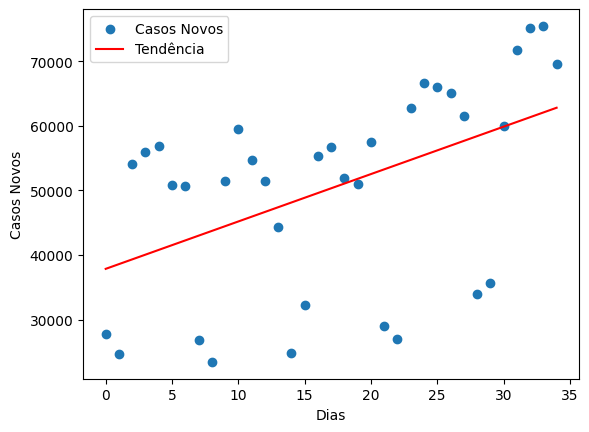

In [37]:
x = df_carnaval.index.values
y = df_carnaval['casosNovos']
slope, intercept, r_value, p_value, std_err = linregress(x,y)

print(f"Inclinação da reta: {slope:.2f}")
print(f"Valor-p: {p_value:.4f}")

# Plotando os dados
plt.scatter(x, y, label="Casos Novos")
plt.plot(x, intercept + slope * x, color='red', label="Tendência")
plt.xlabel("Dias")
plt.ylabel("Casos Novos")
plt.legend()
plt.show()

> Sim, houve uma tendeência de alta nas duas semanas antes do carnaval

## Relatório mensal

In [38]:
PATH_OUTPUT = os.path.join(ROOT_DIR, "output")
PATH_REPORT_DATA_BRAZIL_2021 = os.path.join(PATH_OUTPUT, "report_monthly_brazil_2021.csv")

In [39]:
df = df_brazil

In [40]:
# Iniciando lista de reports
report = []

In [41]:
# Funcao para calcular novos casos e novas mortes suas variações
def calc_cases_and_deads(data, month):
    new_cases = data["casosNovos"].sum()
    new_deads = data["obitosNovos"].sum()

    absolute_variate_cases = None
    absolute_variate_deads = None

    if month > 1:
        cases_last_month = report[month-2][1]
        absolute_variate_cases = new_cases - cases_last_month
        
        deads_last_month = report[month-2][3]
        absolute_variate_deads = new_deads - deads_last_month
    
    return (new_cases, absolute_variate_cases, new_deads, absolute_variate_deads)

In [42]:
# Funcao para calcular casos e obitos acumulados
def calc_accumulate(df_month_brazil):
  accumulate_cases = df_month_brazil["casosAcumulado"].iloc[-1]
  accumulate_deads = df_month_brazil["obitosAcumulado"].iloc[-1]
  
  return (accumulate_cases, accumulate_deads)

In [43]:
# Função para calcular casos e obitos por 100 mil habitantes
def calc_for_100k(new_cases, new_deads):
  cases_for_100k = (new_cases / population_brazil) * 100000
  cases_for_100k = round(cases_for_100k, 2)
  
  deads_for_100k = (new_deads / population_brazil) * 100000
  deads_for_100k = round(deads_for_100k, 2)
  
  return (cases_for_100k, deads_for_100k)

In [44]:
# Gerando relatorios mensais e empurrando para lista report
for month in range(1,13):
    df_month_brazil = df[df["data"].dt.month == month]
    new_cases, absolute_variate_cases, new_deads, absolute_variate_deads = calc_cases_and_deads(df_month_brazil, month)
    accumulate_cases, accumulate_deads = calc_accumulate(df_month_brazil)
    cases_for_100k, deads_for_100k = calc_for_100k(new_cases, new_deads)
    
    days = df_month_brazil.shape[0]
    
    data = [month, new_cases, absolute_variate_cases, new_deads, absolute_variate_deads, accumulate_cases, accumulate_deads, cases_for_100k, deads_for_100k, days]
    report.append(data)

In [45]:
# Criando dataframe do relatorio
report = pd.DataFrame(report, 
    columns = ["mes", "casosNovos", "variacaoDeCasos", "obitosNovos", "variacaoDeObitos", "casosAcumulados", "obitosAcumulados", "Casos por 100 mil habitantes", "Obitos por 100 mil habitantes", "Quantidade de dias"])
report = report.set_index("mes")

In [46]:
# Mudando tipo das variações
report["variacaoDeObitos"] = report["variacaoDeObitos"].astype("Int64")
report["variacaoDeCasos"] = report["variacaoDeCasos"].astype("Int64")
report

,casosNovos,variacaoDeCasos,obitosNovos,variacaoDeObitos,casosAcumulados,obitosAcumulados,Casos por 100 mil habitantes,Obitos por 100 mil habitantes,Quantidade de dias
mes,,,,,,,,,
1,1528758,<NA>,29555,<NA>,9204731,224504,727.47,14.06,31
2,1346528,-182230,30438,883,10551259,254942,640.75,14.48,28
3,2197488,850960,66573,36135,12748747,321515,1045.69,31.68,31
4,1910264,-287224,82266,15693,14659011,403781,909.01,39.15,30
5,1886543,-23721,59010,-23256,16545554,462791,897.72,28.08,31
6,2011587,125044,55275,-3735,18557141,518066,957.23,26.30,30
7,1360714,-650873,38304,-16971,19917855,556370,647.51,18.23,31
8,859015,-501699,24043,-14261,20776870,580413,408.77,11.44,31
9,650203,-208812,16336,-7707,21427073,596749,309.40,7.77,30


> - Podemos enxergar melhor que: depois da semana EPI 7 (14/02 a 20/02) há um aumento significativo no número de casos e consequentemente do número de óbitos
> - Primeira vacina em 17/01/21, com o aumento da cobertura vacinal, foram diminuindo os óbitos e as infecções

### Exportação

In [47]:
df.to_csv(PATH_REPORT_DATA_BRAZIL_2021, sep=";")